In [1]:
import numpy as np
import wandb
project_name = 'Rocket Circularization'

wandb.login(key='47dd3c9c8eed5ab52d02e0a55da0d49a7c83c1da')

from VPG import PolicyNetworkBaseline
from rockect_circularization import RocketCircularization

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: yizhonghu (use `wandb login --relogin` to force relogin)
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /Users/yizhonghu/.netrc


wandb: wandb version 0.12.16 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


2022-05-23 18:16:56.669128: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Out-of-Bounds
Actor Loss:27.562, Critic Loss:11.535
Episode: 0, Iterations: 197, Rewards: 19.680, Loss: 39.096, SimuTime: 0.69, TrainTime: 0.18
Out-of-Bounds


MovieWriter stderr:
dyld[49352]: Library not loaded: @rpath/libopenh264.5.dylib
  Referenced from: /Users/yizhonghu/anaconda3/envs/py3/lib/libavcodec.58.54.100.dylib
  Reason: tried: '/Users/yizhonghu/anaconda3/envs/py3/lib/libopenh264.5.dylib' (no such file), '/Users/yizhonghu/anaconda3/envs/py3/lib/libopenh264.5.dylib' (no such file), '/Users/yizhonghu/anaconda3/envs/py3/lib/libopenh264.5.dylib' (no such file), '/Users/yizhonghu/anaconda3/envs/py3/lib/libopenh264.5.dylib' (no such file), '/Users/yizhonghu/anaconda3/envs/py3/lib/libopenh264.5.dylib' (no such file), '/Users/yizhonghu/anaconda3/envs/py3/lib/libopenh264.5.dylib' (no such file), '/Users/yizhonghu/anaconda3/envs/py3/lib/libopenh264.5.dylib' (no such file), '/Users/yizhonghu/anaconda3/envs/py3/lib/libopenh264.5.dylib' (no such file), '/Users/yizhonghu/anaconda3/envs/py3/lib/libopenh264.5.dylib' (no such file), '/Users/yizhonghu/anaconda3/envs/py3/bin/../lib/libopenh264.5.dylib' (no such file), '/Users/yizhonghu/anaconda3/en

iterations,▁
loss,▁
rewards,▁


CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x432', '-pix_fmt', 'rgba', '-r', '10.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '0.mp4']' died with <Signals.SIGABRT: 6>.

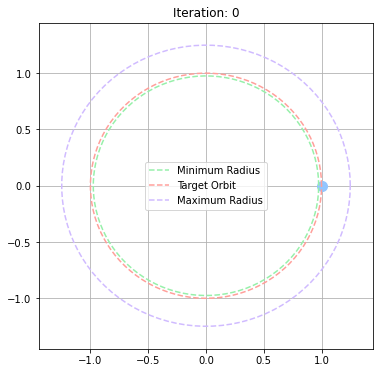

In [2]:
config_network = {
    'actor_hidden_dims': [32, 32],
    'critic_hidden_dims': [32, 32],
    'lr': 0.001
}
config_bounds = {
    'rmin_func': 'exponential',
    'rmin_strategy': [
        {
            'name': 'constant',
            'parameters': {'const': 0.8}
        },
        {
            'name': 'constant',
            'parameters': {'const': 0.99}
        },
        {
            'name': 'constant',
            'parameters': {'const': np.exp(-4)}
        }
    ],
    'rmax_func': 'exponential',
    'rmax_strategy': [
        {
            'name': 'constant',
            'parameters': {'const': 1.2}
        },
        {
            'name': 'constant',
            'parameters': {'const': 1.01}
        },
        {
            'name': 'constant',
            'parameters': {'const': np.exp(-4)}
        }
    ]
}

config_env = {
    'max_iter': 500,
    'evaluation_steps': 0,
    'radius_range': [0.1, 2],
    'target_radius': 1,
    'dt': 0.01,
    'M': 1,
    'm': 0.01,
    'G': 1,
    'init_state': [1, 0, 0, 1.1],
    'thrust_vectors': [[.1, 0], [0, .1], [-.1, 0], [0, -.1]],
    'evaluation_penalty': 1,
    'inbounds_reward': 1,
    'thrust_penalty': .1,
    't_vec_len': 1,
    'polar': True
}
config_training = {
    'episodes': 100000,
    'gamma': 1,
    'vdo_rate': 1000, 
    'save_rate': 100,
}

with wandb.init(project=project_name, config={**config_network, **config_env, **config_training, **config_bounds}) as run:
    dims = 2
    num_thrusters = 4
    rocket_policy = PolicyNetworkBaseline(input_dims=dims * 2,
                                            output_dims=2 ** num_thrusters,
                                            **config_network)
    env = RocketCircularization(bound_config=config_bounds, **config_env)
    rocket_policy.train(env, **config_training)